#### import

In [1]:
# system
import os
from glob import glob

# data
import numpy as np
import cv2

# visualization
import matplotlib.pyplot as plt

%matplotlib inline

## about data

### before preprocessing

In [31]:
print(
    f"{'MSCOCO':>10}: {len(glob('data/after/cocotext-v20/data/*.jpg'))}",
    f"{'Pedestrian':>10}: {len(glob('data/after/PennFudanPed/PNGImages/*.png'))}",
    f"{'Pedestrian':>10}: {len(glob('data/after/pedestrian-detection/*/JPEGImages/*.jpg'))}",
    sep="\n"
)

    MSCOCO: 17141
Pedestrian: 170
Pedestrian: 1339


### train : valid : test = 7 : 2 : 1

In [32]:
base = "data/text"
print(
    f"{'Train':>5}: {len(glob(f'{base}/train/images/*'))}",
    f"{'Valid':>5}: {len(glob(f'{base}/Valid/images/*'))}",
    f"{'Test':>5}: {len(glob(f'{base}/Test/images/*'))}",
    sep="\n"
)

Train: 19670
Valid: 5619
 Test: 2809


## train

batch size: 8
epochs: 100

### blur

In [47]:
import matplotlib
from matplotlib import rc
import matplotlib.font_manager as fm

# font_path = 'C:\\Windows\\Fonts\\Hancom Gothic Regular.ttf'

# font_name = fm.FontProperties(fname=font_path, size=10).get_name()
# rc("font", family=font_name)
# fm._rebuild()

matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams["axes.unicode_minus"] = False
matplotlib.rcParams.update({'font.size': 38})

In [ ]:
path_base = "data/text/test"
name = "487"
# 301, 487, 490, 12624

face_label = f"{path_base}/face-labels/{name}.txt"
text_label = f"{path_base}/text-labels/{name}.txt"


origin = cv2.imread(f"{path_base}/images/{name}.jpg")
face_blur = cv2.imread(f"{path_base}/face-blur/{name}.jpg")
total_blur = cv2.imread(f"{path_base}/total-blur/{name}.jpg")

detect = origin.copy()
with open(face_label, "r") as f:
    lines = f.read()
with open(text_label, "r") as f:
    lines += f.read()
for line in lines.split("\n"):
    c, cx, cy, w, h = map(float, line.split(" "))
    c, sx, sy, fx, fy = map(int,
        [c, (cx - w / 2) * origin.shape[1], (cy - h / 2) * origin.shape[0], (cx + w / 2) * origin.shape[1], (cy + h / 2) * origin.shape[0]])
    c = (200, 0, 0) if c < 1 else (0, 0, 200)
    detect = cv2.rectangle(detect, (sx, sy), (fx, fy), c, 3)


fig, ax = plt.subplots(1, 3, figsize=(20, 6), tight_layout=True)


ax[0].imshow(cv2.cvtColor(origin, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(detect, cv2.COLOR_BGR2RGB))
# ax[2].imshow(cv2.cvtColor(face_blur, cv2.COLOR_BGR2RGB))
ax[2].imshow(cv2.cvtColor(total_blur, cv2.COLOR_BGR2RGB))


# plt.imshow(cv2.cvtColor(origin, cv2.COLOR_BGR2RGB))
# plt.imshow(cv2.cvtColor(detect, cv2.COLOR_BGR2RGB))
# plt.imshow(cv2.cvtColor(total_blur, cv2.COLOR_BGR2RGB))
# plt.axis("off")

for i in range(3):
    ax[i].get_yaxis().set_visible(False)
    ax[i].set_xticks([])
    ax[i].set_xticklabels([])
#     ax[i].axis("off")

ax[0].set_xlabel("(a) 입력 데이터", labelpad=12)
ax[1].set_xlabel("(b) 객체 탐지", labelpad=12)
ax[2].set_xlabel("(c) 비식별화", labelpad=12)

plt.show()

## after train

### data load

In [2]:
face = np.loadtxt("output/face-before-p.csv", delimiter=",")
text = np.loadtxt("output/text-before-p.csv", delimiter=",")
assert len(face) == len(text)
before_p = np.mean([face, text], axis=0)

face = np.loadtxt("output/face-after-p.csv", delimiter=",")
text = np.loadtxt("output/text-after-p.csv", delimiter=",")
assert len(face) == len(text)
after_p = np.mean([face, text], axis=0)

In [3]:
face = np.loadtxt("output/face-before-r.csv", delimiter=",")
text = np.loadtxt("output/text-before-r.csv", delimiter=",")
assert len(face) == len(text)
before_r = np.mean([face, text], axis=0)

face = np.loadtxt("output/face-after-r.csv", delimiter=",")
text = np.loadtxt("output/text-after-r.csv", delimiter=",")
assert len(face) == len(text)
after_r = np.mean([face, text], axis=0)

In [4]:
face = np.loadtxt("output/face-before-f1.csv", delimiter=",")
text = np.loadtxt("output/text-before-f1.csv", delimiter=",")
assert len(face) == len(text)
before_f1 = np.mean([face, text], axis=0)

face = np.loadtxt("output/face-after-f1.csv", delimiter=",")
text = np.loadtxt("output/text-after-f1.csv", delimiter=",")
assert len(face) == len(text)
after_f1 = np.mean([face, text], axis=0)

In [5]:
face = np.loadtxt("output/face-before-py.csv", delimiter=",")
text = np.loadtxt("output/text-before-py.csv", delimiter=",")
assert len(face) == len(text)
before_py = np.mean([face, text], axis=0)

face = np.loadtxt("output/face-after-py.csv", delimiter=",")
text = np.loadtxt("output/text-after-py.csv", delimiter=",")
assert len(face) == len(text)
after_py = np.mean([face, text], axis=0)

In [6]:
face = np.loadtxt("output/face-before-ap.csv", delimiter=",")
text = np.loadtxt("output/text-before-ap.csv", delimiter=",")
assert len(face) == len(text)
before_ap = np.mean([face, text], axis=0)

face = np.loadtxt("output/face-after-ap.csv", delimiter=",")
text = np.loadtxt("output/text-after-ap.csv", delimiter=",")
assert len(face) == len(text)
after_ap = np.mean([face, text], axis=0)

### draw

In [7]:
px = np.linspace(0, 1, 1000)

#### Precision-Recall Curve

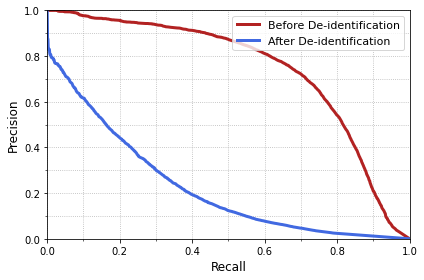

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), tight_layout=True)
ax.plot(px, before_py, linewidth=3, color="firebrick", label="Before De-identification")
ax.plot(px, after_py, linewidth=3, color="royalblue", label="After De-identification")

ax.set_xticks([0.1 * i for i in range(10)], minor=True)
ax.set_yticks([0.1 * i for i in range(10)], minor=True)
ax.grid(linestyle=":", which="minor")
ax.grid(linestyle=":", which="major")

ax.set_xlabel("Recall", fontdict={"fontsize": 12})
ax.set_ylabel("Precision", fontdict={"fontsize": 12})
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
plt.legend(loc="upper right", fontsize=11)
# plt.title("(2) 재현율에 따른 정밀도 변화", position=(0.5, 1.05))
plt.show()

#### Precision Curve

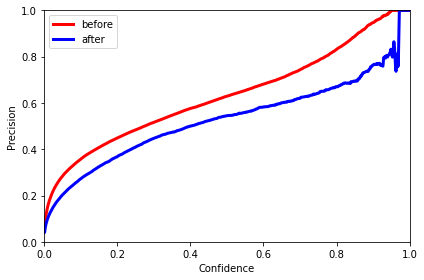

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), tight_layout=True)
ax.plot(px, before_p, linewidth=3, color="red", label="before")
ax.plot(px, after_p, linewidth=3, color="blue", label="after")

ax.set_xlabel("Confidence")
ax.set_ylabel("Precision")
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
plt.legend(loc="upper left")
plt.show()

#### Recall Curve

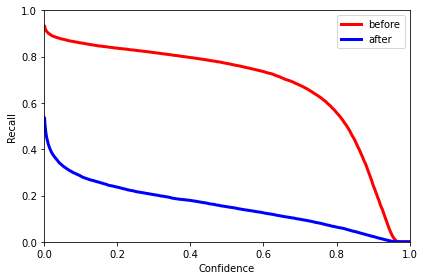

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), tight_layout=True)
ax.plot(px, before_r, linewidth=3, color="red", label="before")
ax.plot(px, after_r, linewidth=3, color="blue", label="after")

ax.set_xlabel("Confidence")
ax.set_ylabel("Recall")
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
plt.legend(loc="upper right")
plt.show()

#### F1-score Curve

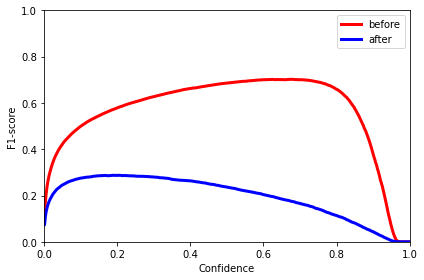

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), tight_layout=True)
ax.plot(px, before_f1, linewidth=3, color="red", label="before")
ax.plot(px, after_f1, linewidth=3, color="blue", label="after")

ax.set_xlabel("Confidence")
ax.set_ylabel("F1-score")
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
plt.legend(loc="upper right")
plt.show()

#### for one (we are one)

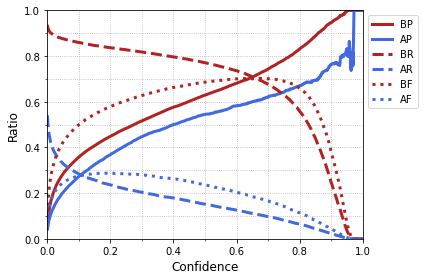

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), tight_layout=True)

ax.plot(px, before_p, '-', linewidth=3, color="firebrick", label="BP")
ax.plot(px, after_p, '-', linewidth=3, color="royalblue", label="AP")

ax.plot(px, before_r, '--', linewidth=3, color="firebrick", label="BR")
ax.plot(px, after_r, '--', linewidth=3, color="royalblue", label="AR")

ax.plot(px, before_f1, ':', linewidth=3, color="firebrick", label="BF")
ax.plot(px, after_f1, ':', linewidth=3, color="royalblue", label="AF")

ax.set_xticks([0.1 * i for i in range(10)], minor=True)
ax.set_yticks([0.1 * i for i in range(10)], minor=True)
ax.grid(linestyle=":", which="minor")
ax.grid(linestyle=":", which="major")

ax.set_xlabel("Confidence", fontdict={"fontsize": 12})
ax.set_ylabel("Ratio", fontdict={"fontsize": 12})
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

### AP

In [44]:
before = before_f1.argmax()
after = after_f1.argmax()
print(
    f"before\t2809\t13259\t{before_p[before]:.3f}\t{before_r[before]:.3f}\t{before_ap.mean():.3f}\t{before_ap[0]:.3f}",
    f"  face\t2809\t4441\t0.735\t0.712\t0.773\t0.596",
    f"  text\t2796\t8818\t0.741\t0.667\t0.716\t0.49",
    "",
    f" after\t2809\t13259\t{after_p[after]:.3f}\t{after_r[after]:.3f}\t{after_ap.mean():.3f}\t{after_ap[0]:.3f}",
    f"  face\t2809\t4441\t0.492\t0.332\t0.353\t0.198",
    f"  text\t2796\t8818\t0.236\t0.148\t0.0958\t0.0677",
    sep="\n")

before	2809	13259	0.724	0.696	0.543	0.745
  face	2809	4441	0.735	0.712	0.773	0.596
  text	2796	8818	0.741	0.667	0.716	0.49

 after	2809	13259	0.373	0.235	0.133	0.224
  face	2809	4441	0.492	0.332	0.353	0.198
  text	2796	8818	0.236	0.148	0.0958	0.0677


### F1-score

In [15]:
face = np.loadtxt("output/face-before-f1.csv", delimiter=",")
text = np.loadtxt("output/text-before-f1.csv", delimiter=",")
assert len(face) == len(text)
before_f1 = np.mean([face, text], axis=0)

before = before_f1.argmax()
print(round(face[before], 3), round(text[before], 3), round(before_f1[before], 3))

face = np.loadtxt("output/face-after-f1.csv", delimiter=",")
text = np.loadtxt("output/text-after-f1.csv", delimiter=",")
assert len(face) == len(text)
after_f1 = np.mean([face, text], axis=0)

after = after_f1.argmax()
print(round(face[after], 3), round(text[after], 3), round(after_f1[after], 3))

0.714 0.691 0.702
0.396 0.179 0.288
